# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

* [1. Откройте файл с данными и изучите общую информацию](#first-bullet)
* [2. Предобработка данных ](#pookie)
* [3. Посчитайте и добавьте в таблицу новые столбцы](#intro).

### Откройте файл с данными и изучите общую информацию.<a class="anchor" id="first-bullet"></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv ('/datasets/real_estate_data.csv', sep='\t')
data.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
DATA_SHAPE = data.shape[0]
DATA_SHAPE

23699

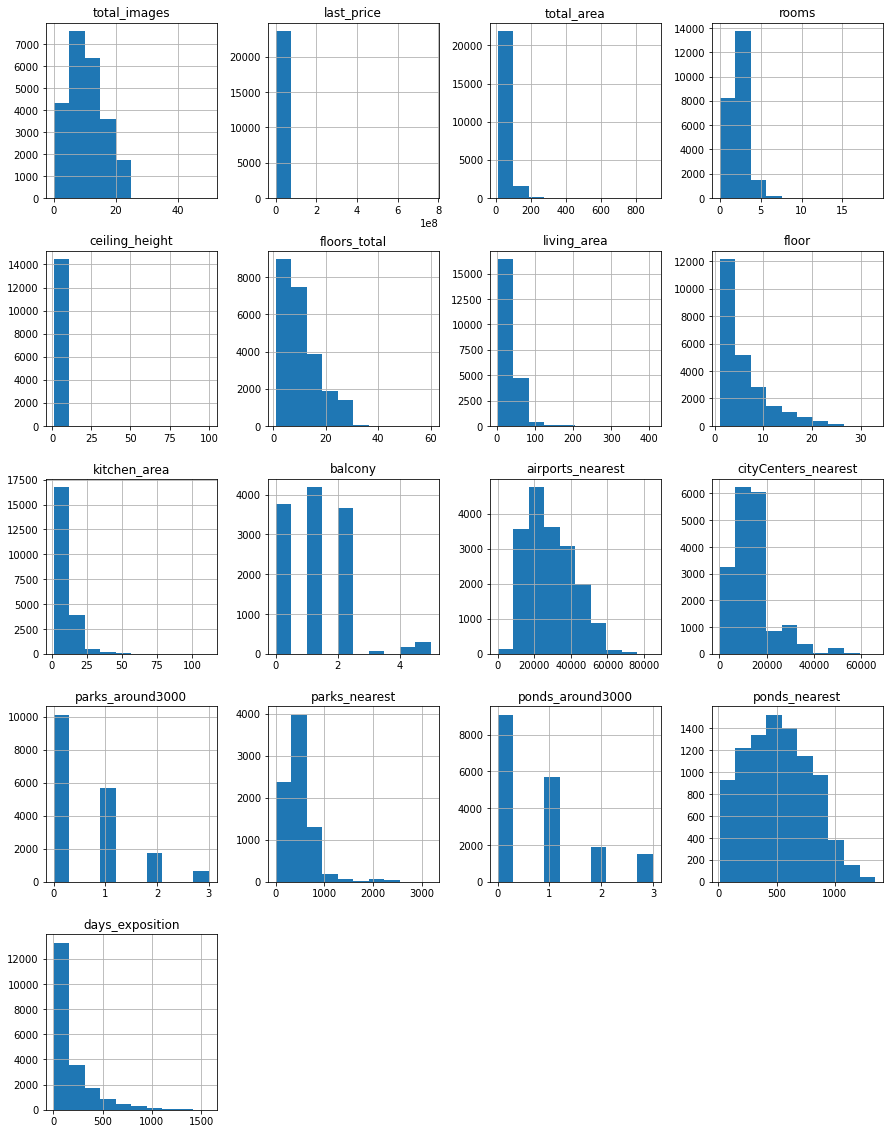

In [4]:
data.hist(figsize=(15, 20));

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Предобработка данных<a name="pookie2"></a>

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

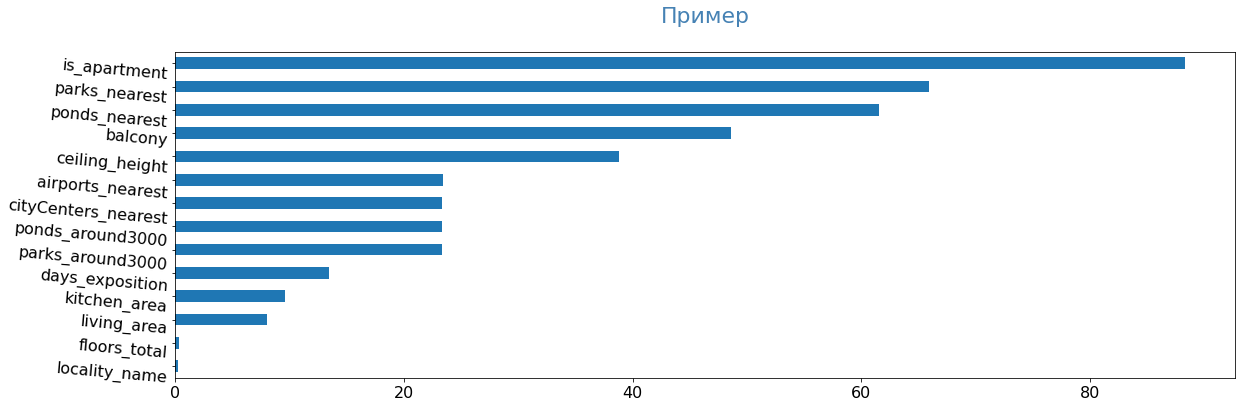

In [8]:
pass_value_barh(data)

In [9]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)
data['balcony'] = data['balcony'].fillna(0)


#data['floors_total'] = data['floors_total'].fillna(value='') #Можно было поставить пустую строчку но тогда он не поменяет в целые.
data = data.dropna(subset=['floors_total'])
data = data.dropna(subset=['locality_name']) 

In [10]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Заполнил пропущенные значения в столбце balcony (балкон), kitchen_area (куханная зона), если продавец в данных случаях пропустил значения, то, скорее всего, в его квартире они отсутствуют. Такие пропуски правильно заменить на 0. Удалим строки с пропусуами во floors_total (всего этажей) и locality_name (название населённого пункта) поскольку таким количеством данных можно пренебреч.

In [11]:
data['floors_total'] = data['floors_total'].astype(int)
data['is_apartment'] = data['is_apartment'].astype(bool)
data['balcony'] = data['balcony'].astype(int)


In [12]:
try:    
    data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
    print('1ok')
except:
    print('first_day_exposition to_datetime type conversion fail')

1ok


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Поскольку floors_total (всего этажей в доме) может быть только целым. Врядли кто то будит учитывать пол этажа или треть его из float64 надо переделать в int64, аналогично и для балконов. Из описания данных следует, что is_apartment (апартаменты) булевый тип, и из логики тоже является булевым значением (првди или ложь). Изменения помогут быстрее работать программе.

In [14]:
def loc_length():
    return print('Количество уникальных занчений locality_name:', data['locality_name'].unique().shape[0])
loc_length()

Количество уникальных занчений locality_name: 364


In [15]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

После прочтения уникальных значений видны две наиболее распостроненных неявных повторения. 1 - где то пишут посёлок, а где то поселок, заменим на одно из них. 2 - пишут городской поселок и поселок городского типа. Также выбирим один из вариантов. Поселок городского типа Рябово есть в примере поэтому знаем, что его тоже можно заменить.

In [16]:
#data['locality_name'] = data['locality_name'].replace('поселок Бугры', 'посёлок Бугры')
#data['locality_name'] = data['locality_name'].replace('городской поселок Янино-1', 'городской посёлок Янино-1')
#data['locality_name'] = data['locality_name'].replace('поселок Пансионат Зелёный Бор', 'посёлок Пансионат Зелёный Бор')
#Выискивать по 1 и заменять долго и есть большая вероятность пропустить дубликат.
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'посёлок городского типа')
data['locality_name'] = data['locality_name'].replace('поселок Рябово', 'поселок городского типа Рябово')

In [17]:
def loc_length():
    return print('Количество уникальных занчений locality_name:', data['locality_name'].unique().shape[0])
loc_length()

Количество уникальных занчений locality_name: 323


In [18]:
#Проверяем ушли ли значения
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары',
       'посёлок городского типа Янино-1', 'посёлок Парголово',
       'посёлок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёл

In [19]:
# check
data.locality_name.nunique()

323

In [20]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,9.565173,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,6.407798,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,6.300000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,11.410000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Поиск выбрасов и анамалий
* total_images (число фотографий квартиры в объявлении). Данные выглядят вполне реалистично.
* last_price (цена на момент снятия с публикации). Минимальная цена квартиры выглядит нериалистичной. Лучше убрать квартиры стоимостью меньше 300000 рублей. Максимальные цены вполне могут быть и выше за элитную недвижимость.
* total_area (общая площадь квартиры в квадратных метрах (м²)). Данные выглядят вполне реалистично.
* rooms (количество комнат) 0 может имется в виду студии или апортоменты в которых единое жилое пространство. Это надо проверить.
* ceiling_height (высота потолков (м)). Минимум 1 метр и максимум 100м., скорее всего опечатки и их надо удалить. Вообще высота менее 2 метров даже при нестандартной планировки звучит как минимум странно, есть нормы которые недопускают строить ниже 2.5м. Также кажется неразумным строить жилую недвижимость с высотой потолков более 5 метров. А это значит что от 25м до 50м, скорее всего закралась ошибка и просто непоставили запятую.
* floors_total (всего этажей в доме). Из википедии самый высокое здание в Питербурге 88 этажей, следущее по высоте 42 этажа и есть еще 2 здания выше 30 этажей,в 37 и 32. Из этого делаю вывод, что выше 42 этажей можно отбросить как выбрас или опечатки, поскольку максимум показывает 60 этажей а строение выше 42 всего 1 и оно 88 этажей, а не 60.
* (living_area)  жилая площадь в квадратных метрах (м²). Жилая площадь в 2м² смотрится как выброс. Думаю нет смысла рассматривать менее 8м².
* floor (этаж). Посмотрим на значения с этажностью зданий и будем опиратся на полученные данные.
* kitchen_area (площадь кухни в квадратных метрах (м²)). Возможно 0 там где кухни нет. Студии, свободная планировка,  апартаменты.
* balcony (количество болклнов). Данные выглядят вполне реалистично.
* airports_nearest	(расстояние до ближайшего аэропорта в метрах (м)). Минимальное растояние 0, значит либо ошибка, либо на территории аэропорта. Такие данные лучше исключить.
* cityCenters_nearest (расстояние до центра города (м)). Данные выглядят вполне реалистично.
* parks_around3000 (число парков в радиусе 3 км). Данные выглядят вполне реалистично.
* parks_nearest (расстояние до ближайшего парка (м)). Данные выглядят вполне реалистично.
* ponds_around3000 (число водоёмов в радиусе 3 км). Данные выглядят вполне реалистично.
* ponds_nearest (расстояние до ближайшего водоёма (м)). Данные выглядят вполне реалистично.
* days_exposition (сколько дней было размещено объявление (от публикации до снятия)). Данные выглядят вполне реалистично.

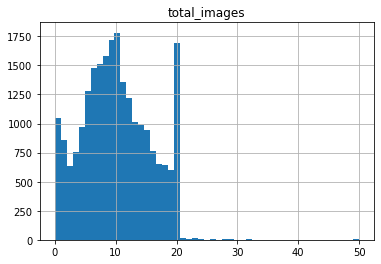

In [21]:
data.hist('total_images', range = (0, 50), bins=51);

In [22]:
print('менее 20 фотографий: ', data.query('total_images > 0 and total_images < 20')['total_images'].count())
print('более 20 фотографий: ', data.query('total_images > 20')['total_images'].count())
print(' 20 фотографий: ', data.query('total_images == 20')['total_images'].count())

менее 20 фотографий:  20749
более 20 фотографий:  75
 20 фотографий:  1690


Виден резкий отрыв тех кто делал более 20 фотографий. Может быть несколько причин, ошибка в данных, ограничения программы (обычная подбиска не более 20 фото, а премиум больше). Либо неправельно применил код.

In [23]:
print('Квартир стоимостью меньше 700.000:', data.query('last_price < 7e+05')['last_price'].count())

print('Квартир стоимостью больше 50.000.000:', data.query('last_price > 5e+07')['last_price'].count())


Квартир стоимостью меньше 700.000: 69
Квартир стоимостью больше 50.000.000: 131


In [24]:
data.drop(index=data.query('last_price > 5e+07').index,inplace=True)
data.drop(index=data.query('last_price < 7e+05').index,inplace=True)

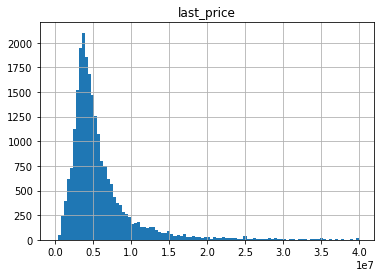

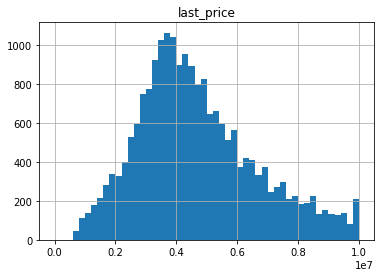

In [25]:
data.hist('last_price', bins=100, range=(0,4e+07));
data.hist('last_price', bins=50, range=(0,1e+07));

График похож на распределение Пуасонна. Выбросы встречаются, но это скорее связано с бессознательной любовью определенным уровням стоимости. 

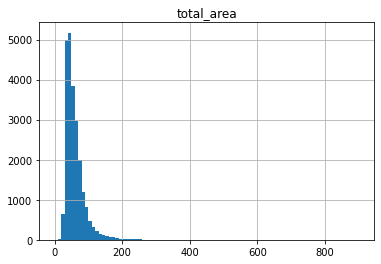

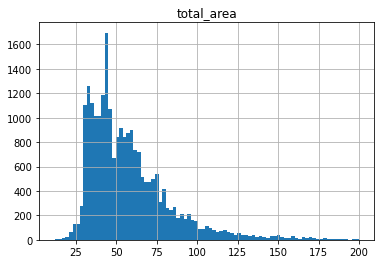

In [26]:
data.hist('total_area', range = (0, 900), bins=90);
data.hist('total_area', range = (12, 200), bins=85); 

In [27]:
print('от 25 до 100 общая площадь квартиры (м²): ', data.query('total_area >= 25 and total_area <= 100')['total_area'].count())
print('меньше 20  общая площадь квартиры (м²): ', data.query('total_area < 20')['total_area'].count())
print('более 250 общая площадь квартиры (м²): ', data.query(' total_area > 250')['total_area'].count())
print('более 600 общая площадь квартиры (м²): ', data.query(' total_area > 600')['total_area'].count())

от 25 до 100 общая площадь квартиры (м²):  21490
меньше 20  общая площадь квартиры (м²):  27
более 250 общая площадь квартиры (м²):  56
более 600 общая площадь квартиры (м²):  0


Мы с помощью графиков и подстановак выявили, что с более 250м² менее 100 квартир. Нельзя забывать что по ходу работы мы удаляем анамальные значения поэтому количество уменьшается, например тут уже нет квартир более 600 м². Есть выбросы но думаю это связано с типовой застройкой и самым популярным метрожом. Мы уберем квартиры более 250м² поскольку такихменьше 100 и данный выброс связан скорее всего с элитным и редким жильем, в данной работе нет задачи расматривать такие варианты.

In [28]:
data.drop(index=data.query('total_area > 250').index,inplace=True)
data.drop(index=data.query('total_area < 20').index,inplace=True)

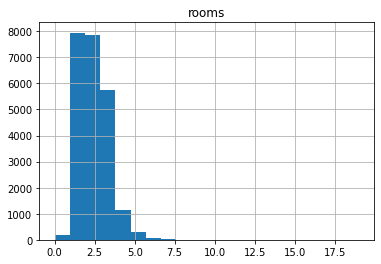

In [29]:
data.hist('rooms', range = (0, 19), bins=20);

In [30]:
print('от 0 до 19  комнат: ', data.query('rooms >= 0 and rooms <= 19')['rooms'].count())
print('более 7 комнат: ', data.query('rooms > 7')['rooms'].count())
print('0  комнат: ', data.query('rooms == 0')['rooms'].count())

от 0 до 19  комнат:  23282
более 7 комнат:  14
0  комнат:  185


Проверяем свою теорию, есть ли квартиры не студии и свободной планировки без комнат. Если есть то их надо удалить поскольку это будет явной ошибкой. Также можно пожертвовать квартирами более 7 комнат, для уменьшения выбросов и частоты датосета.

In [31]:
print('Квартиры без комнат не студии и не свободная планировка:',
      data.query('rooms == 0 and ~open_plan and ~studio')['rooms'].count())
data.drop(index=data.query('rooms > 7').index,inplace=True)
print('более 7 комнат: ', data.query('rooms > 7')['rooms'].count())

Квартиры без комнат не студии и не свободная планировка: 0
более 7 комнат:  0


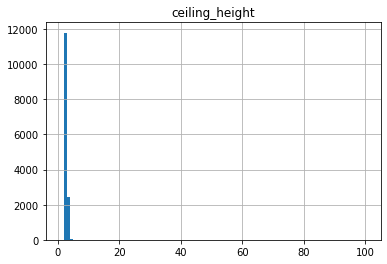

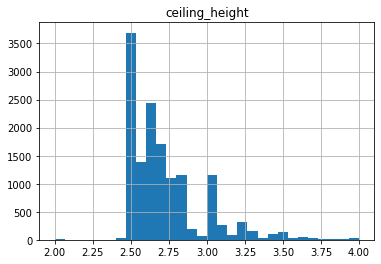

In [32]:
data.hist('ceiling_height', range = (1, 100), bins=100);
data.hist('ceiling_height', range = (2, 4), bins=30);

In [33]:
print('от 4 до 25  высота потолка: ', data.query('ceiling_height >= 4 and ceiling_height <= 25')['ceiling_height'].count())
print('более 32м. высота потолка: ', data.query('ceiling_height > 32')['ceiling_height'].count())
print('менее 2,5м  высота потолка: ', data.query('ceiling_height < 2.5')['ceiling_height'].count())
print('от 25 до 32  высота потолка: ', data.query('ceiling_height >= 25 & ceiling_height <= 32')['ceiling_height'].count())

от 4 до 25  высота потолка:  82
более 32м. высота потолка:  1
менее 2,5м  высота потолка:  73
от 25 до 32  высота потолка:  19


In [34]:
data.drop(index=data.query('ceiling_height > 4 and ceiling_height < 25').index,inplace=True)

data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 32)]['ceiling_height']/10)

data.drop(index=data.query('ceiling_height > 32').index,inplace=True)
data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)

In [35]:
print('от 4 до 25  высота потолка: ', data.query('ceiling_height > 4 and ceiling_height <= 25')['ceiling_height'].count())
print('более 32м. высота потолка: ', data.query('ceiling_height > 32')['ceiling_height'].count())
print('менее 2,5м  высота потолка: ', data.query('ceiling_height < 2.5')['ceiling_height'].count())
print('от 25 до 32  высота потолка: ', data.query('ceiling_height >= 25 and ceiling_height <= 32')['ceiling_height'].count())

от 4 до 25  высота потолка:  0
более 32м. высота потолка:  0
менее 2,5м  высота потолка:  0
от 25 до 32  высота потолка:  0


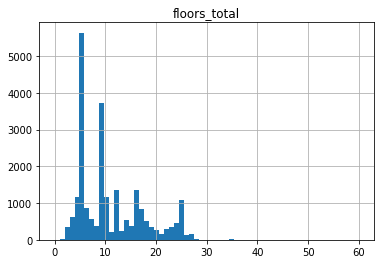

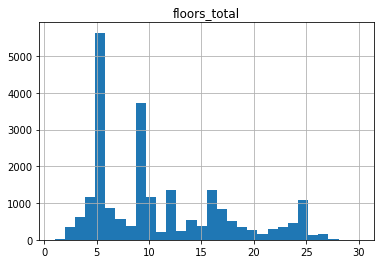

In [36]:

data.hist('floors_total', range = (0, 60), bins=61);
data.hist('floors_total', range = (1, 30), bins=30);

In [37]:
print('от 1 до 60  этажей: ', data.query('floors_total >= 1 and floors_total <= 60')['floors_total'].count())
print('от 42  этажей: ', data.query('floors_total == 42')['floors_total'].count())
print('от 37  этажей: ', data.query('floors_total == 37')['floors_total'].count())
print('от 32  этажей: ', data.query('floors_total == 32')['floors_total'].count())
print('от 29  этажей: ', data.query('floors_total == 29')['floors_total'].count())
print('выше 29  этажей: ', data.query('floors_total > 29')['floors_total'].count())

от 1 до 60  этажей:  23151
от 42  этажей:  0
от 37  этажей:  0
от 32  этажей:  0
от 29  этажей:  1
выше 29  этажей:  31


Видны всплески на некоторых значениях, думаю это связано с типовой застройкой, много строили 5 и 9 этажек еще в СССР. Строений в 42, 37 и 32 этажа неоказалось следующее значение идет в 29 этажей, такое есть. Значит все что выше 29 этажей можно смело удалять. 

In [38]:
data.drop(index=data.query('floors_total > 29').index,inplace=True)

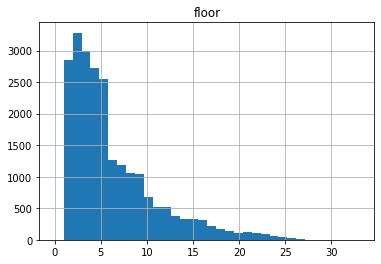

In [39]:
data.hist('floor', range = (0, 33), bins=34);

In [40]:
print('квартиры выше 29  этажей: ', data.query('floors_total > 29')['floors_total'].count())

квартиры выше 29  этажей:  0


При удалении аномально высоких зданий, удалили и неверную этажность. Остовляем значения как есть.

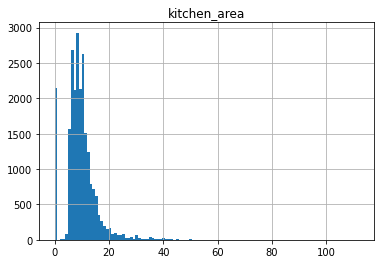

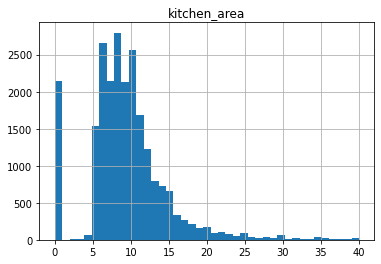

In [41]:
data.hist('kitchen_area', range = (0, 112), bins=113);
data.hist('kitchen_area', range = (0, 40), bins=41);

In [42]:
print('площадь кухни больше 0 меньше 4 (м²): ', data.query('kitchen_area > 0 and kitchen_area < 4')['kitchen_area'].count())
print('площадь кухни равная 0 (м²): ', data.query('kitchen_area == 0')['kitchen_area'].count())
print('площадь кухни больше 50 (м²): ', data.query('kitchen_area > 50')['kitchen_area'].count())

площадь кухни больше 0 меньше 4 (м²):  23
площадь кухни равная 0 (м²):  2139
площадь кухни больше 50 (м²):  23


In [43]:
print('Квартиры без кухни и студии:',data.query('kitchen_area == 0 and studio')['kitchen_area'].count()) 

print('Квартиры без кухни и апартаменты:',data.query('kitchen_area == 0 and is_apartment')['kitchen_area'].count()) 

print('Квартиры без кухни и свободная планировка:',data.query('kitchen_area == 0 and open_plan')['kitchen_area'].count())

Квартиры без кухни и студии: 137
Квартиры без кухни и апартаменты: 1975
Квартиры без кухни и свободная планировка: 64


In [44]:
data.drop(index=data.query('kitchen_area > 0 and kitchen_area < 4').index,inplace=True)
data.drop(index=data.query('kitchen_area > 50').index,inplace=True)

Видно, что в основном нет кухон в апартаментах. Значение с кухней меньше 4 м² и больше 50 м² была удалины.

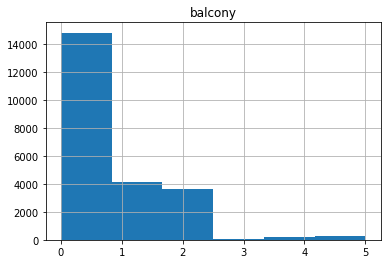

In [45]:
data.hist('balcony', range = (0, 5), bins=6);

In [46]:
print('От 0 до 5 болконов: ', data.query('balcony >= 0 and balcony <= 5')['balcony'].count())
print('Без болконов: ', data.query('balcony == 0')['balcony'].count())
print('С 3 болконами: ', data.query('balcony == 3')['balcony'].count())
print('С 4 болконами: ', data.query('balcony == 4')['balcony'].count())
print('С 5 болконами: ', data.query('balcony == 5')['balcony'].count())

От 0 до 5 болконов:  23074
Без болконов:  14806
С 3 болконами:  78
С 4 болконами:  178
С 5 болконами:  297


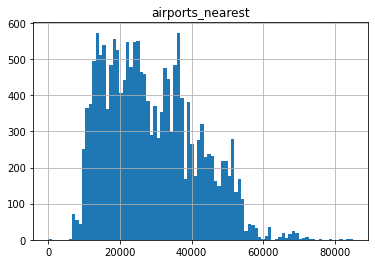

In [47]:
 data.hist('airports_nearest', range = (0, 85000), bins=90);

In [48]:
print('5000м. до аэропорта: ', data.query('airports_nearest <= 5000')['airports_nearest'].count())
print('В аэропорту: ', data.query('airports_nearest == 0')['airports_nearest'].count())

5000м. до аэропорта:  1
В аэропорту:  1


In [49]:
data.drop(index=data.query('airports_nearest == 0').index,inplace=True)

Удалили точку в аэропорту.

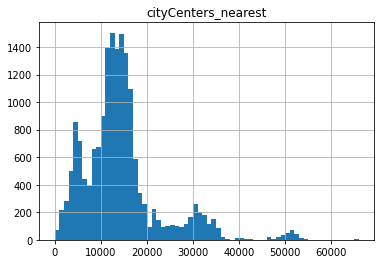

In [50]:
data.hist('cityCenters_nearest', range = (0, 66000), bins=66);

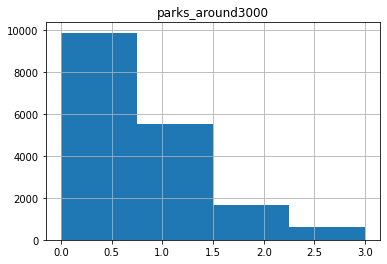

In [51]:
data.hist('parks_around3000', range = (0, 3), bins=4);

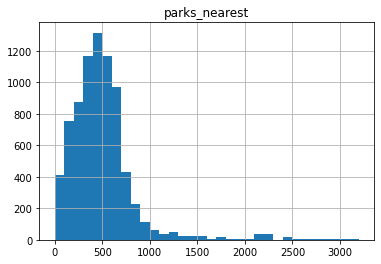

In [52]:
data.hist('parks_nearest', range = (0, 3200), bins=32);

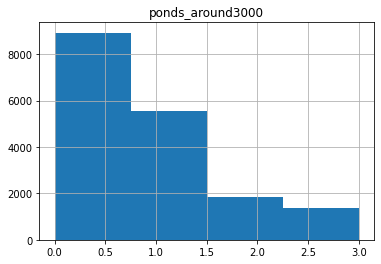

In [53]:
data.hist('ponds_around3000', range = (0, 3), bins=4);

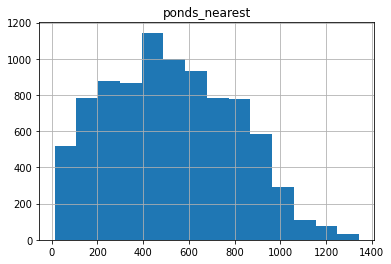

In [54]:
data.hist('ponds_nearest', range = (13, 1344), bins=14);

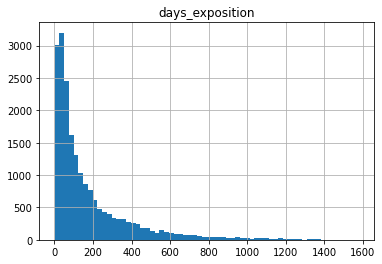

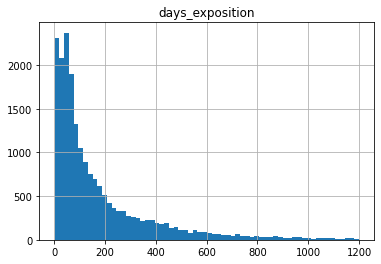

In [55]:
data.hist('days_exposition', range = (1, 1580), bins=64);
data.hist('days_exposition', range = (1, 1200), bins=64);

In [56]:
print('Обявление размещено более 1200 дней: ', data.query('days_exposition > 1200')['days_exposition'].count())

Обявление размещено более 1200 дней:  88


Обявлений размещенных более 1200 дней немного, можно их посчитать за выброс.

In [57]:
data.drop(index=data.query('days_exposition > 1200').index,inplace=True)

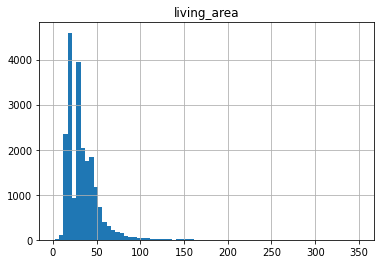

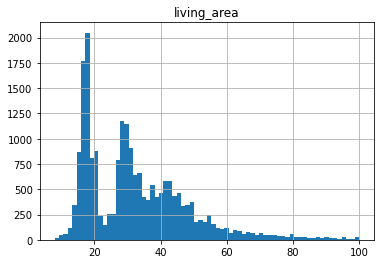

In [58]:
data.hist('living_area', range = (2, 350), bins=70);
data.hist('living_area', range = (8, 100), bins=70);

In [59]:
print('жилая площадь от 10 до 150 (м²): ', data.query('living_area >= 10 and living_area < 150')['living_area'].count())
print('жилая площадь меньше 10 (м²): ', data.query('living_area < 10')['living_area'].count())
print('жилая площадь больше 150 (м²): ', data.query('living_area > 150')['living_area'].count())

жилая площадь от 10 до 150 (м²):  21134
жилая площадь меньше 10 (м²):  23
жилая площадь больше 150 (м²):  28


Думаю жилую площадь меньше 10 м² и больше 150 м² можно посчитать за выбросы и удалить их.

In [60]:
data.drop(index=data.query('living_area < 10').index,inplace=True)
data.drop(index=data.query('living_area > 150').index,inplace=True)

Cбросим индексацию после удаления строк.

In [61]:
data.reset_index(drop=True,inplace=True)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22934 entries, 0 to 22933
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22934 non-null  int64         
 1   last_price            22934 non-null  float64       
 2   total_area            22934 non-null  float64       
 3   first_day_exposition  22934 non-null  datetime64[ns]
 4   rooms                 22934 non-null  int64         
 5   ceiling_height        14044 non-null  float64       
 6   floors_total          22934 non-null  int64         
 7   living_area           21135 non-null  float64       
 8   floor                 22934 non-null  int64         
 9   is_apartment          22934 non-null  bool          
 10  studio                22934 non-null  bool          
 11  open_plan             22934 non-null  bool          
 12  kitchen_area          22934 non-null  float64       
 13  balcony         

In [63]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22934.000000,2.293400e+04,22934.000000,22934.000000,14044.000000,22934.000000,21135.000000,22934.000000,22934.000000,22934.000000,17541.000000,17561.000000,17562.000000,7725.000000,17562.000000,8684.000000,19858.000000
mean,9.870847,5.885356e+06,58.221057,2.037935,2.715481,10.723642,33.281061,5.889509,9.351621,0.596887,28869.902970,14324.993622,0.599078,491.828220,0.752306,523.635767,174.731494
std,5.663785,4.655275e+06,26.841237,0.996899,0.248457,6.538277,17.458630,4.857288,5.612758,0.961570,12711.824692,8587.757340,0.790515,341.295559,0.925582,277.175485,205.611684
min,0.000000,7.000000e+05,20.000000,0.000000,2.500000,1.000000,10.000000,1.000000,0.000000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.405000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,6.300000,0.000000,18459.000000,9508.000000,0.000000,288.000000,0.000000,303.000000,44.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,8.900000,0.000000,26911.000000,13171.000000,0.000000,456.000000,0.000000,509.000000,94.000000
75%,14.000000,6.657500e+06,68.600000,3.000000,2.800000,16.000000,42.000000,8.000000,11.300000,1.000000,37407.000000,16316.000000,1.000000,613.000000,1.000000,734.000000,226.000000
max,50.000000,5.000000e+07,250.000000,7.000000,4.000000,29.000000,150.000000,27.000000,50.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1200.000000


Добавил и удалил данные по условиям:
* rooms > 7
* 20 > total_area > 250
* 700000 > last_price > 50.000.000
* 10 < living_area > 150
* floors_total > 29
* 2.5 > eiling_height > 4
* airports_nearest == 0
* 4 < kitchen_area < 50, оставил = 0 

Удалил или заменил все пропуски для
* locality_name
* floors_total
* balcony
* kitchen_area

#### check gap

In [64]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22934 entries, 0 to 22933
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22934 non-null  int64         
 1   last_price            22934 non-null  float64       
 2   total_area            22934 non-null  float64       
 3   first_day_exposition  22934 non-null  datetime64[ns]
 4   rooms                 22934 non-null  int64         
 5   ceiling_height        14044 non-null  float64       
 6   floors_total          22934 non-null  int64         
 7   living_area           21135 non-null  float64       
 8   floor                 22934 non-null  int64         
 9   is_apartment          22934 non-null  bool          
 10  studio                22934 non-null  bool          
 11  open_plan             22934 non-null  bool          
 12  kitchen_area          22934 non-null  float64       
 13  balcony         

In [65]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,934.00","22,934.00","14,044.00","19,858.00","22,934.00","21,135.00","22,934.00","22,934.00","22,934.00"
min,0.00,20.00,2.50,1.00,"700,000.00",10.00,0.00,1.00,1.00
max,7.00,250.00,4.00,"1,200.00","50,000,000.00",150.00,50.00,27.00,29.00


In [66]:
# check
import matplotlib.pyplot as plt

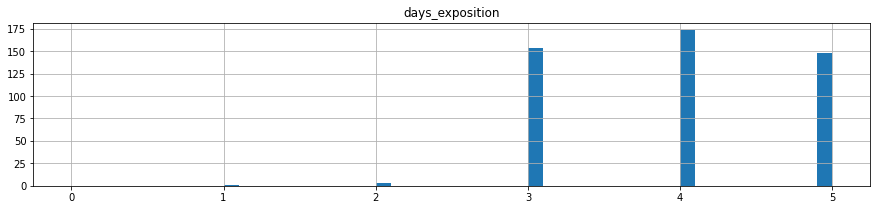

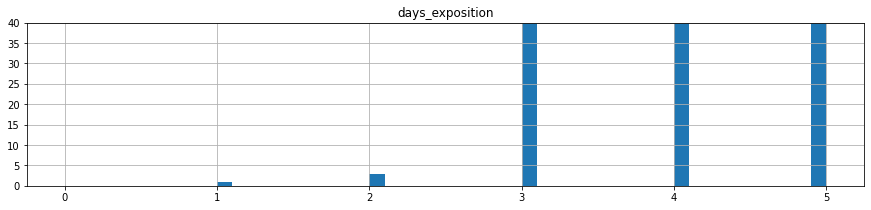

In [67]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [68]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,7861
2,7754
3,5666
4,1112
5,270
0,180
6,64
7,27


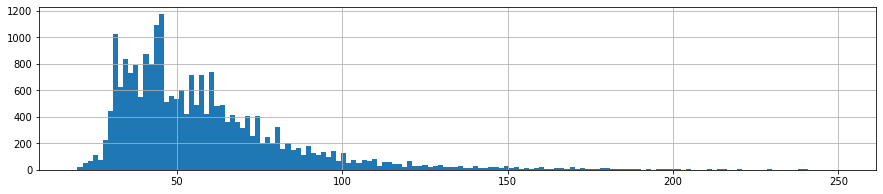

In [69]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

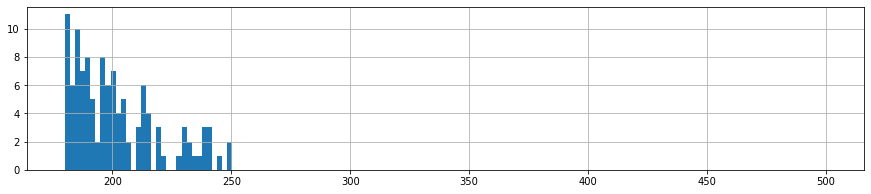

In [70]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

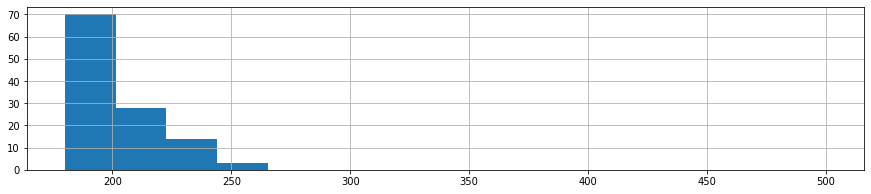

In [71]:
# check
data.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

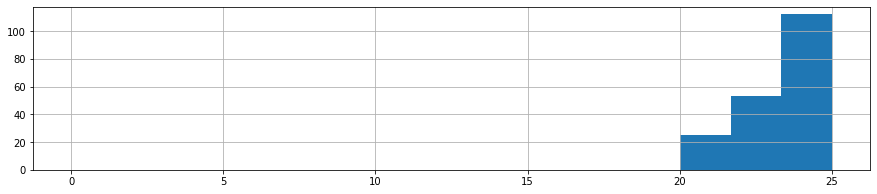

In [72]:
# check
data.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [73]:
DATA_SHAPE = data.shape[0] / DATA_SHAPE
DATA_SHAPE

0.9677201569686484

In [74]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,21.90,2.50,3.00,"750,000.00",10.00,0.00,1.00,2.00
0.01,1.00,26.00,2.50,4.00,"1,100,000.00",13.30,0.00,1.00,2.00
0.5,2.00,52.00,2.65,94.00,"4,600,000.00",30.00,8.90,4.00,9.00
0.99,5.00,160.93,3.60,979.43,"26,000,000.00",98.00,30.00,22.00,26.00
0.9988,6.00,214.00,4.00,"1,164.00","43,697,875.60",134.23,44.95,26.00,27.00


### Посчитайте и добавьте в таблицу новые столбцы<a id='intro'> 

In [75]:
#цена одного квадратного метра
data['cost_per_sqm'] = data['last_price'] / data['total_area']

In [76]:
#день недели публикации объявления
data['dayofweek'] = data['first_day_exposition'].dt.dayofweek

In [77]:
#месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month

In [78]:
#год публикации объявления
data['year'] = data['first_day_exposition'].dt.year

In [79]:
#тип этажа квартиры (значения — «первый», «последний», «другой»)
data['floor_category'] = data.apply(
    lambda x: 'первый' if (x.floor == 1) 
    else ('последний' if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 'другой'), axis=1
)

data['floor_category_digit'] = data.apply(
    lambda x: 0 if (x.floor == 1) 
    else (2 if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 1), axis=1
)

In [80]:
#расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
data['city_centers_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

### Проведите исследовательский анализ данных

#### Изучите следующие параметры объектов:

In [81]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sqm,dayofweek,month,year,floor_category_digit,city_centers_nearest_km
count,22934.000000,2.293400e+04,22934.000000,22934.000000,14044.000000,22934.000000,21135.000000,22934.000000,22934.000000,22934.000000,...,7725.000000,17562.000000,8684.000000,19858.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,17561.000000
mean,9.870847,5.885356e+06,58.221057,2.037935,2.715481,10.723642,33.281061,5.889509,9.351621,0.596887,...,491.828220,0.752306,523.635767,174.731494,97527.993979,2.567803,6.401413,2017.382794,1.015218,14.319401
std,5.663785,4.655275e+06,26.841237,0.996899,0.248457,6.538277,17.458630,4.857288,5.612758,0.961570,...,341.295559,0.925582,277.175485,205.611684,38912.489695,1.787982,3.490265,1.024882,0.511316,8.596039
min,0.000000,7.000000e+05,20.000000,0.000000,2.500000,1.000000,10.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,13.000000,1.000000,10507.246377,0.000000,1.000000,2014.000000,0.000000,0.000000
25%,6.000000,3.405000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,6.300000,0.000000,...,288.000000,0.000000,303.000000,44.000000,76562.500000,1.000000,3.000000,2017.000000,1.000000,10.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,8.900000,0.000000,...,456.000000,0.000000,509.000000,94.000000,94736.842105,3.000000,6.000000,2017.000000,1.000000,13.000000
75%,14.000000,6.657500e+06,68.600000,3.000000,2.800000,16.000000,42.000000,8.000000,11.300000,1.000000,...,613.000000,1.000000,734.000000,226.000000,113536.931818,4.000000,10.000000,2018.000000,1.000000,16.000000
max,50.000000,5.000000e+07,250.000000,7.000000,4.000000,29.000000,150.000000,27.000000,50.000000,5.000000,...,3190.000000,3.000000,1344.000000,1200.000000,848484.848485,6.000000,12.000000,2019.000000,2.000000,66.000000


общая площадь. total_area — общая площадь квартиры в квадратных метрах (м²)

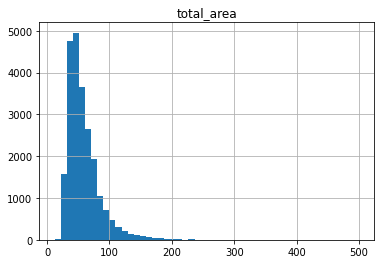

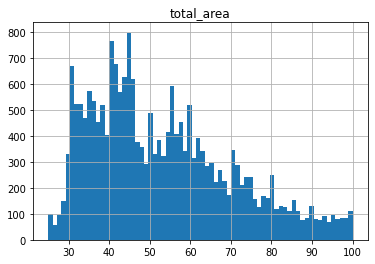

In [82]:
data.hist('total_area', range = (12, 500), bins=50);
data.hist('total_area', range = (25, 100), bins=70);

In [83]:
print('от 12 до 495 общая площадь квартиры (м²): ', data.query('total_area >= 12 and total_area <= 495')['total_area'].count())
print('от 25 до 60 общая площадь квартиры (м²): ', data.query('total_area >= 25 and total_area <= 60')['total_area'].count())
print('от 30 до 100 общая площадь квартиры (м²): ', data.query('total_area >= 30 and total_area <= 100')['total_area'].count())

от 12 до 495 общая площадь квартиры (м²):  22934
от 25 до 60 общая площадь квартиры (м²):  14668
от 30 до 100 общая площадь квартиры (м²):  20779



Из гистограммы видно что основное количество квартир прихоится на определенную площадь. Это логично видь есть типовые застройки и стандартных квартир большенство. Восновном это где то от 25 до 100м². Причем от 30 до 60 м² встречаются чаще всего, что может говарить о их наибольшей востребованости и распостроненности.

жилая площадь. living_area — жилая площадь в квадратных метрах (м²).

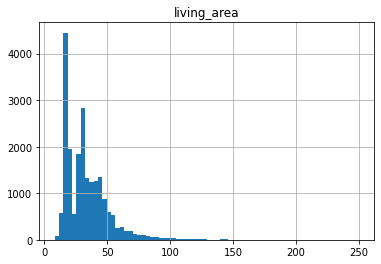

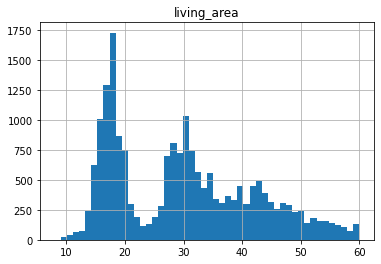

In [84]:
data.hist('living_area', range = (8, 250), bins=70);
data.hist('living_area', range = (8, 60), bins=50);

In [85]:
print('жилая площадь от 2 до 250 (м²): ', data.query('living_area >= 8 and living_area <= 250')['living_area'].count())
print('жилая площадь от 12 до 21  (м²): ', data.query('living_area >= 12 and living_area <= 21')['living_area'].count())
print('жилая площадь от 26 до 50  (м²): ', data.query('living_area >= 26 and living_area <= 50')['living_area'].count())

жилая площадь от 2 до 250 (м²):  21135
жилая площадь от 12 до 21  (м²):  6829
жилая площадь от 26 до 50  (м²):  10820



Из гистограммы можно сделать вывод, что у нас 2 пика от 12 до 21 и от 26 до 50. Такое распределение может говорить о ошибке, но в нашем случаи я склоняюсь к особеностям проектов и построек, возможно из за особеностей проектов получается 2 вершины. 

Площадь кухни. kitchen_area — площадь кухни в квадратных метрах (м²)

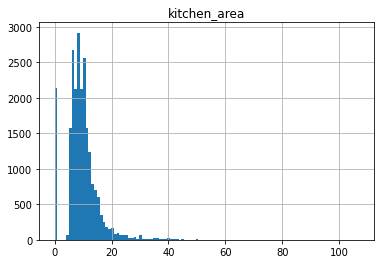

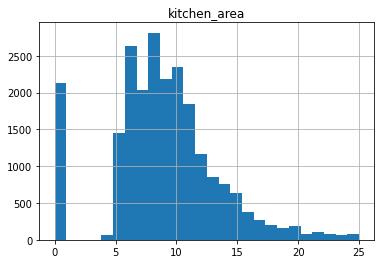

In [86]:
data.hist('kitchen_area', range = (0, 107), bins=108);
data.hist('kitchen_area', range = (0, 25), bins=26);

Выброс с 0 это посчитали квартиры где нет кухон, другие выбросы думаю связаны с особенностями планировки и нормами при строительстве.

цена объекта. last_price — цена на момент снятия с публикации

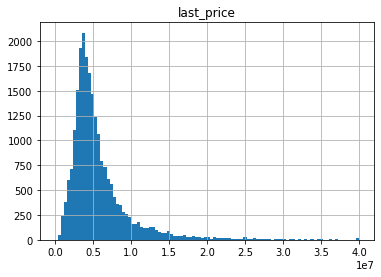

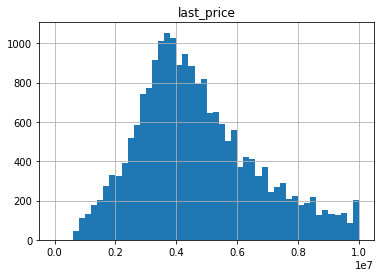

In [87]:
data.hist('last_price', bins=100, range=(0,4e+07));
data.hist('last_price', bins=50, range=(0,1e+07));

График похож на распределение Пуасонна. Выбросы встречаются, но это скорее связано с бессознательной любовью определенным уровням стоимости. 

количество комнат. rooms — число комнат.

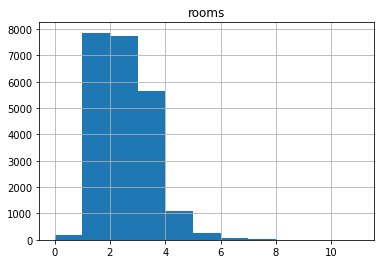

In [88]:
data.hist('rooms', range = (0, 11), bins=11);

Чаще всего в квартире от 1 до 3 комнат. Это логично. Таких квартир больше всего построено, квартиры где больше 4 комнат застройщику продать будет затруднительно.

высота потолков;  ceiling_height — высота потолков (м)

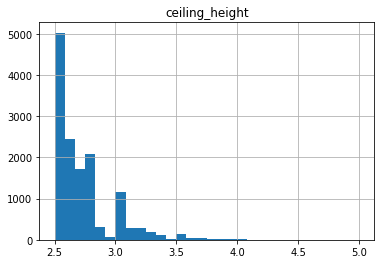

In [89]:
data.hist('ceiling_height', range = (2.5, 5), bins=30);

Такие данные тоже можно обяснить типичными проектами и нормами.

этаж квартиры. floor — этаж

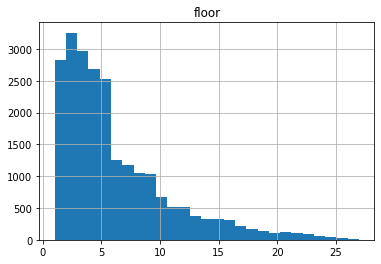

In [90]:
data.hist('floor', range = (1, 27), bins=27);

Такие данные могут говарить о том что высоток относительно немного. Думаю если мы бы разбирали Москву данные были бы другие.

floor_category - тип этажа квартиры («первый», «последний», «другой»);

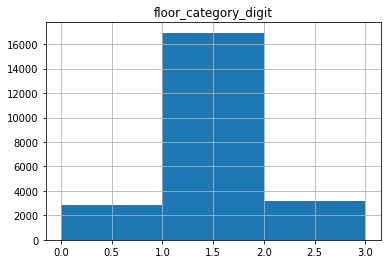

In [91]:
data.hist('floor_category_digit', range = (0, 3), bins=3);

Похоже на правду, первые и последние этажи поровну, а между ними все остальные.

общее количество этажей в доме. floors_total — всего этажей в доме

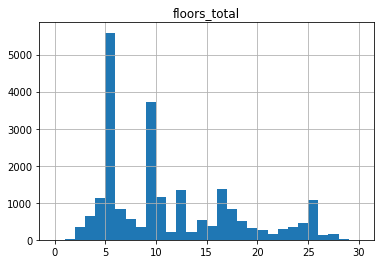

In [92]:
data.hist('floors_total', range = (0, 30), bins=30);

Похоже на правду. При плановой экономики наиболее популярно было строить 5 и 9 этажные здания.

расстояние до центра города в метрах. cityCenters_nearest — расстояние до центра города (м)

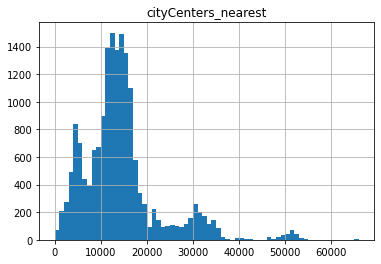

In [93]:
data.hist('cityCenters_nearest', range = (0, 66000), bins=66);

График выглядит логично, сначала плотность заселения и радиус охвата увеличиваются, доходят до определенного уровня и начинают уменьшатся за счет уменьшения плотности заселенности, по пикам можно определить скопление проживающих. Пик в начале может свидетелствовать о том, что в данном диопазоне максимально выгодная застройка. Я был в питери, там действительно плотная застройка в центре, потом много свободного места с жилыми районами.

расстояние до ближайшего аэропорта. airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

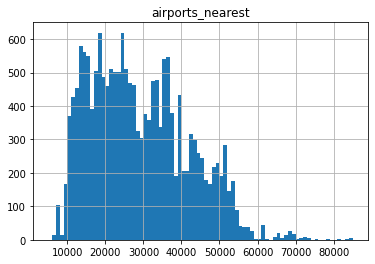

In [94]:
 data.hist('airports_nearest', range = (5000, 85000), bins=80);

Тут можем предположить, что аэропорт находится в отдалении от основной жилой застройки, что вполне разумно но недалеко от города. 

расстояние до ближайшего парка. parks_nearest — расстояние до ближайшего парка (м)

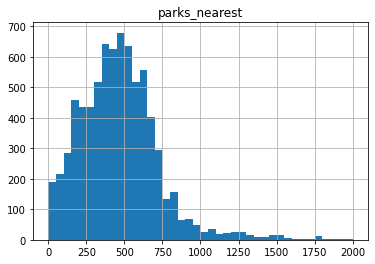

In [95]:
data.hist('parks_nearest', range = (0, 2000), bins=40);

Большенство людей если купят квартиру с обявления смогут дойти до парка пройдя менее 1км.

день - dayofweek, месяц - month, year - год публикации объявления.

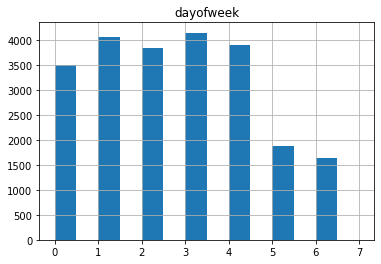

In [96]:
data.hist('dayofweek', range = (0, 7), bins=14);

В будни люди чаще размещают обявления чем в выходные.

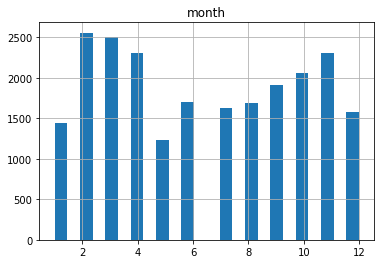

In [97]:
data.hist('month', range = (1, 12), bins=24);

Пред и после новогодний месяцы сниженная активность, после резкий рост и небольшое снижение. В маи резкий спад, после рост, 3 летних месяца примерно на 1 уровне, после рост до декабря. Я считаю, что выборка в 5 лет не является репрезентативно особенно с учетом того, что первые 3 года был рост и начала развития а на последним видим сильный спад.

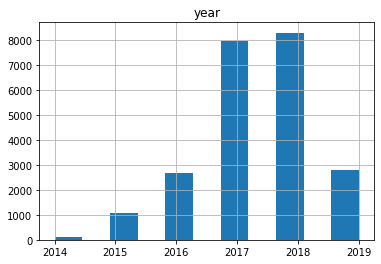

In [98]:
data.hist('year', range = (2014, 2019), bins=11);

С конца 2014 года по 2017 поток обявлений бурно ростет. Небольшой рос с 17 по 18 год, после нам дале только треть 2019 года, но по динамики 4 месяцев можно предположить небольшой рост.

In [99]:
data.year.value_counts().to_frame()

,year
2018,8302
2017,7968
2019,2807
2016,2688
2015,1058
2014,111


In [100]:
debt_and_children = data.pivot_table(index=['year'], columns='month', values = 'dayofweek', aggfunc='count')

debt_and_children

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,95.0
2015,53.0,48.0,95.0,44.0,57.0,86.0,82.0,84.0,81.0,140.0,145.0,143.0
2016,115.0,247.0,340.0,406.0,420.0,447.0,137.0,87.0,118.0,122.0,129.0,120.0
2017,282.0,421.0,218.0,621.0,546.0,658.0,561.0,718.0,965.0,907.0,1205.0,866.0
2018,576.0,1301.0,1001.0,297.0,147.0,515.0,850.0,804.0,754.0,894.0,809.0,354.0
2019,414.0,542.0,857.0,935.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Упростим задачу поиска минимума и максимума

In [101]:
# check
data.first_day_exposition.min()

Timestamp('2014-11-27 00:00:00')

In [102]:
# check
data.first_day_exposition.max()

Timestamp('2019-05-03 00:00:00')

#### Изучите, как быстро продавались квартиры (столбец days_exposition).

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

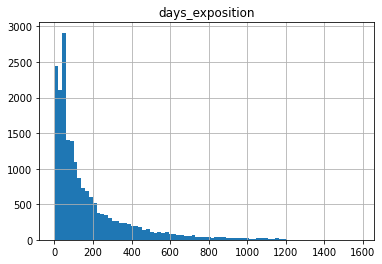

In [103]:
data.hist('days_exposition', range = (1, 1580), bins=80)

In [104]:
print('Среднее время продажи квартиры в днях:',int(data['days_exposition'].mean()))
print('Медианное время продажи квартиры в днях:',int(data['days_exposition'].median()))

Среднее время продажи квартиры в днях: 174
Медианное время продажи квартиры в днях: 94


Средняя почти вдвое выше чем медианная из за длинного хваста. Некоторые обявления очень долго весят. Видимо продавци не торопятся и ждут своего клиента. Если отбросить хотябы 25% самых долгих обявлений то значения сильно изменятся. Из графика хорошо видно, что большенство обявлений приходятся на первые 200 дней. 

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

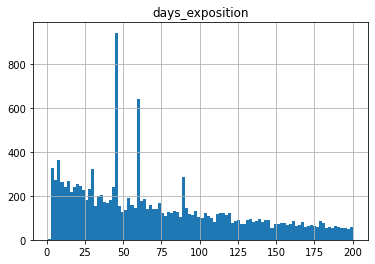

In [105]:
data.hist('days_exposition', range = (1, 200), bins=100)

Есть несколько выбрасов, возможно в эти дни были какието акции или пиар компания. За быстрые обявления я бы взял первые 25% которые около 45 дней, а за необычно долгими взял бы последнии 25% тоесть около 220 дней. Хотя и средняя около 180 дней кажется довольно долгим сроком и равняется почти полу году, что хорошо для восприятия.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта

In [106]:
list_for_graph = ['total_area',
                  'living_area',
                  'kitchen_area',
                  'rooms',
                  'floor_category_digit',
                  'year']

for entry in list_for_graph:
    correlation = data['last_price'].corr(data[entry])
    print(f'Корреляция между last_price и {entry} составляет: {correlation:0.1%}')

Корреляция между last_price и total_area составляет: 76.9%
Корреляция между last_price и living_area составляет: 66.2%
Корреляция между last_price и kitchen_area составляет: 49.0%
Корреляция между last_price и rooms составляет: 47.7%
Корреляция между last_price и floor_category_digit составляет: 5.2%
Корреляция между last_price и year составляет: -3.3%


Построим графики, которые покажут зависимость цены от указанных выше параметров.

Зависимость цена от количества комнат. Находим через rooms — число комнат

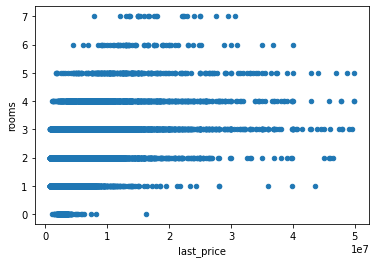

In [107]:
data.query('last_price < 50000000').plot(x='last_price', y='rooms', kind='scatter'); 

Зависимость цена от общей площади. Находим через total_area — общая площадь квартиры в квадратных метрах (м²)

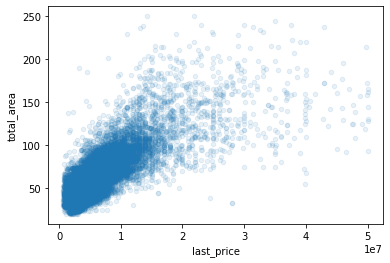

In [108]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1);

Зависимость цена от общей площади. Находим через living_area — жилая площадь в квадратных метрах (м²)

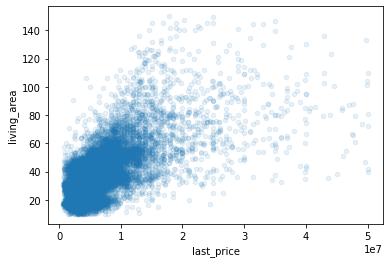

In [109]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.1);

Зависимость цена от площади кухни. Находим через kitchen_area — площадь кухни в квадратных метрах (м²)

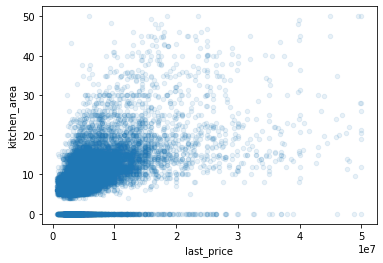

In [110]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.1);

Зависимость цена от этажа, на котором расположена квартира (первый, последний, другой).

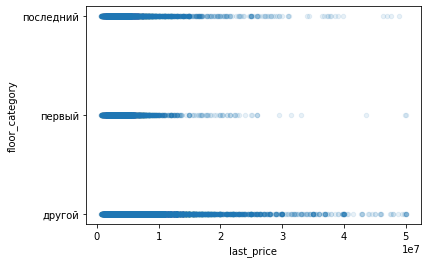

In [111]:
data.plot(x='last_price', y='floor_category', kind='scatter', alpha=0.1);

Зависимость цена от даты размещения (день недели).

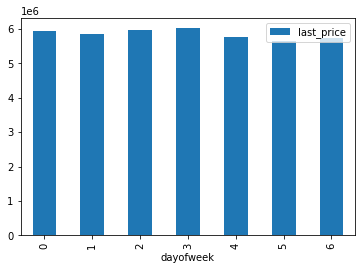

In [112]:
data.pivot_table(index='dayofweek',values='last_price').plot(y='last_price', kind='bar');

Зависимость цена от даты размещения ( месяц).

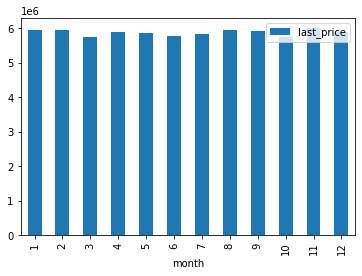

In [113]:
data.pivot_table(index='month',values='last_price').plot(y='last_price', kind='bar');


Зависимость цена от даты размещения (год).

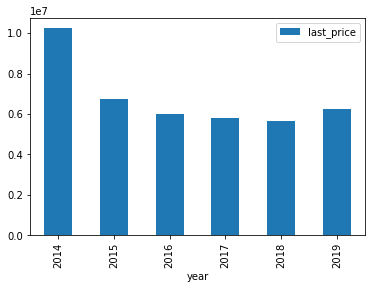

In [114]:
data.pivot_table(index='year',values='last_price').plot(y='last_price', kind='bar');

Разницы от месяца и числа подачи обявления на стоимость почти невидно кроме года подачи. Но возможно в начале выставляли более дорагие квартиры, да и выборка в первый год не высока, поэтому по последнему графику выводы делать не стоит. А вот по дням недели  и месяцам можно поробовать дополнительный график для наглядности.

In [115]:
data.pivot_table(index='year', values='total_area', aggfunc=['mean','count'])

,mean,count
,total_area,total_area
year,,
2014,80.918288,111
2015,65.837325,1058
2016,59.984405,2688
2017,58.334342,7968
2018,56.560370,8302
2019,57.354325,2807


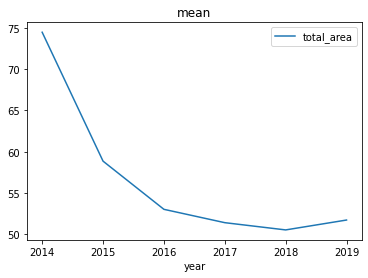

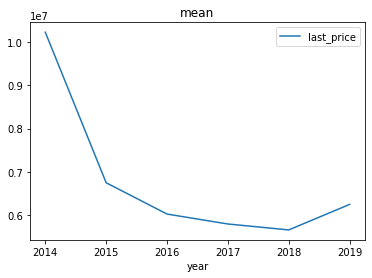

In [116]:
data.pivot_table(index='year',values='total_area',aggfunc='median').plot(y='total_area', kind='line', title='mean');
data.pivot_table(index='year',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');

Зависимость цена от даты размещения (день недели) с использованием медианого значения и средней.

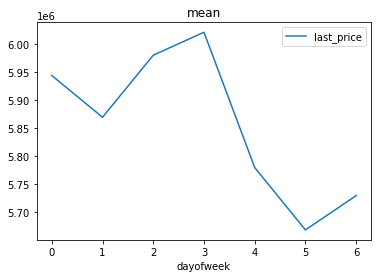

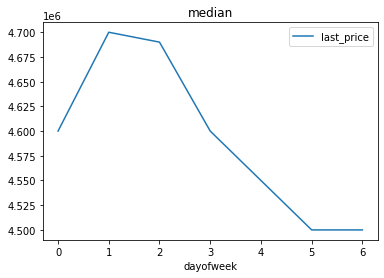

In [117]:
data.pivot_table(index='dayofweek',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='dayofweek',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

Зависимость цена от даты размещения (месяц) с использованием медианого значения и средней.

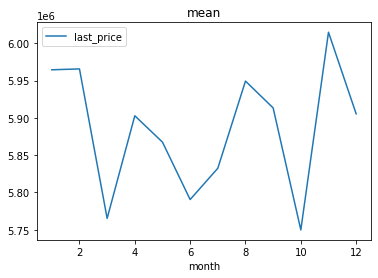

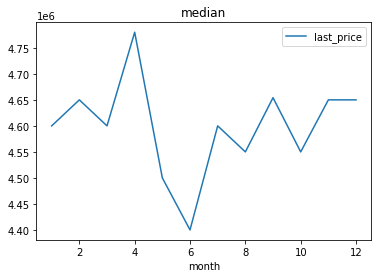

In [118]:
data.pivot_table(index='month',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='month',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

Цена зависит от:

* общей площади;
* жилой площади;
* площади кухни;
* количества комнат. (платят все же чащи за метраж, количество комнат это косвенный признак)

* Цена практически не зависит от:

* этажа, на котором расположена квартира;
(Первые этажи зачастую стоят немного дешевли, хотя в них и размещают магазины и офисы)
* даты размещения. 
(Тут скорее всего будут иметь значения при более длительной выборки годы, поскольку есть годы где действительно менялась сильно цены)

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

<AxesSubplot:ylabel='locality_name'>

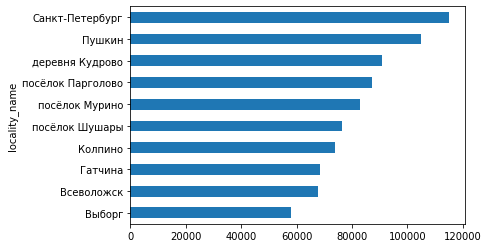

In [119]:
top_10 = data.pivot_table(index='locality_name', values=['last_price','total_area'] ,aggfunc=['sum','count'])
top_10.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count']
top_10.pop('total_area_count')
top_10.sort_values(by=['last_price_count'],ascending=False, inplace=True)
top_10 = top_10.iloc[:10]
top_10['price_per_sq_m'] = top_10['last_price_sum']/top_10['total_area_sum']
top_10.sort_values(by=['price_per_sq_m'],ascending=True, inplace=True)
top_10['price_per_sq_m'].plot(kind='barh')

По графику видим, что самая дорогая недвижемость в самом Санкт-Петербурге. В 10 вошли самые близкие к Санкт-Петербургу населенные пункты.

#### Вычислите среднюю цену каждого километра в Санкт-Петербурге .

<AxesSubplot:xlabel='city_centers_nearest_km'>

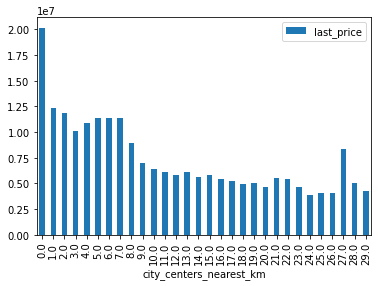

In [120]:
flat_spb = data.query('locality_name == "Санкт-Петербург"')

flat_spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean').plot(kind='bar')

В центре самые дорогие квартиры. Особенно выделяется недвижимость до 1 км. После цена падат, с 3 до 7 км. немного растет и после снова падает. Есть пик на 27км. возможно там есть район с элитной недвижемостью. Такое распределение возможно из за особеностей застройки, ценности зданий и пристижа района, расположением метро. В Санкт-Петербурге очень много исторически значимых домов в центри города поэтому сложно сказать в каком из них недвижимость будет дороже.

In [121]:
flat_spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc=['mean','count'])

,mean,count
,last_price,last_price
city_centers_nearest_km,,
0.0,2.015279e+07,19
1.0,1.234146e+07,164
2.0,1.180137e+07,270
3.0,1.005036e+07,329
4.0,1.086885e+07,647
5.0,1.137579e+07,842
6.0,1.137479e+07,565
7.0,1.136854e+07,391


### Общий вывод

#### Предобработка данных
В дата сети присутствовали пропуски. В 'kitchen_area' и 'balcony' пропуски были заменены 0 поскольку их пропуск скорее всего обазначает отсутствие. Пропуски же в 'floors_total' и 'locality_name' были удалены, даже совместно они занимали менее 1%. Были проанализированы все данные и удалил данные по условиям: rooms > 7; 20 < total_area > 250; 700000 < last_price > 50.000.000; 10 < living_area > 150; floors_total > 29; 2.5 >= eiling_height > 4; airports_nearest = 0; 0 < kitchen_area < 4 kitchen_area >50. Также были посчитаны и добавлены новые сталбци.


#### Анализ данных

In [122]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sqm,dayofweek,month,year,floor_category_digit,city_centers_nearest_km
count,22934.000000,2.293400e+04,22934.000000,22934.000000,14044.000000,22934.000000,21135.000000,22934.000000,22934.000000,22934.000000,...,7725.000000,17562.000000,8684.000000,19858.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,17561.000000
mean,9.870847,5.885356e+06,58.221057,2.037935,2.715481,10.723642,33.281061,5.889509,9.351621,0.596887,...,491.828220,0.752306,523.635767,174.731494,97527.993979,2.567803,6.401413,2017.382794,1.015218,14.319401
std,5.663785,4.655275e+06,26.841237,0.996899,0.248457,6.538277,17.458630,4.857288,5.612758,0.961570,...,341.295559,0.925582,277.175485,205.611684,38912.489695,1.787982,3.490265,1.024882,0.511316,8.596039
min,0.000000,7.000000e+05,20.000000,0.000000,2.500000,1.000000,10.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,13.000000,1.000000,10507.246377,0.000000,1.000000,2014.000000,0.000000,0.000000
25%,6.000000,3.405000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,6.300000,0.000000,...,288.000000,0.000000,303.000000,44.000000,76562.500000,1.000000,3.000000,2017.000000,1.000000,10.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,8.900000,0.000000,...,456.000000,0.000000,509.000000,94.000000,94736.842105,3.000000,6.000000,2017.000000,1.000000,13.000000
75%,14.000000,6.657500e+06,68.600000,3.000000,2.800000,16.000000,42.000000,8.000000,11.300000,1.000000,...,613.000000,1.000000,734.000000,226.000000,113536.931818,4.000000,10.000000,2018.000000,1.000000,16.000000
max,50.000000,5.000000e+07,250.000000,7.000000,4.000000,29.000000,150.000000,27.000000,50.000000,5.000000,...,3190.000000,3.000000,1344.000000,1200.000000,848484.848485,6.000000,12.000000,2019.000000,2.000000,66.000000


##### Изучены и описаны следующие параметры:
* общая площадь;
Больше всего типовой планировки от 30 до 60 м², что может говарить о их наибольшей востребованости и распостроненности.

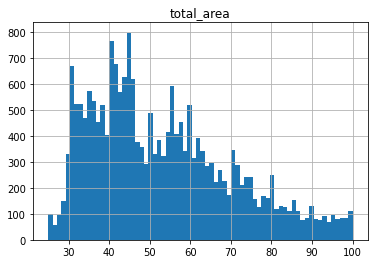

* жилая площадь;
Из гистограммы можно сделать вывод, что у нас 2 пика от 12 до 21 и от 26 до 50. Я бы уточнил у специалиста по недвижимости возможно ли такое распределение из за особеностей жилых построек в изучаемой области.

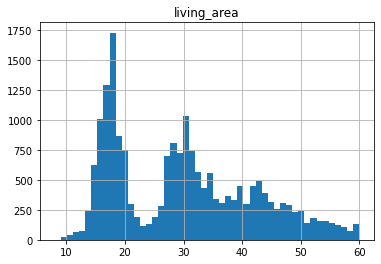

* площадь кухни;
Выброс с 0 это посчитали квартиры где нет кухон, другие выбросы думаю связаны с особенностями планировки и нормами при строительстве.

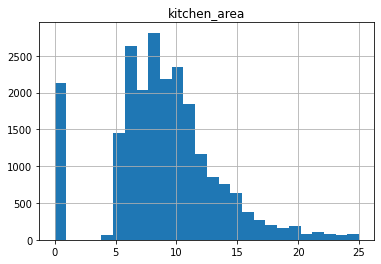

* цена объекта;
Видим равномерное распределение с длинным хвостм (немноггочисленных предложений очень дорогой недвижимости).

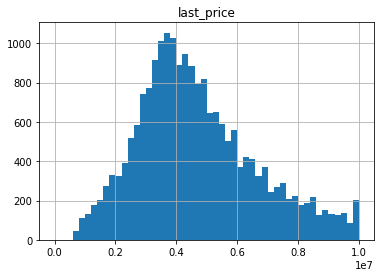

* количество комнат;
Чаще всего в квартире от 1 до 3 комнат.

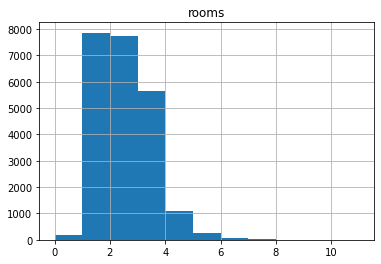

* высота потолков;
Прослеживаются выбросы на определенных уровнях. Такие данные можно обяснить типичными проектами и нормами.

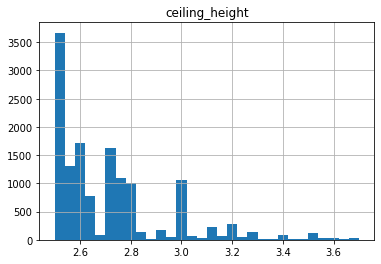

* этаж квартиры;
Поскольку Санкт-Петербург горот с малым количеством высоток, особенно его исторический центр то и его основное распределение с 1 по 9 закономерно.

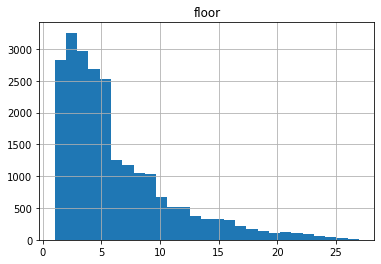

* тип этажа квартиры («первый», «последний», «другой»);
Первые и последние этажи поровну, а между ними основная часть.

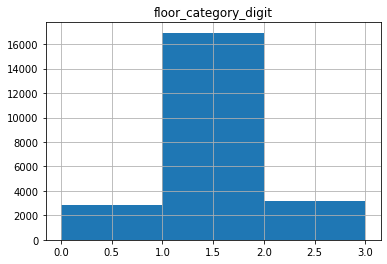

* общее количество этажей в доме;
В СССР наиболее популярно было строить 5 и 9 этажные здания. Также и более ранняя застройка в Санкт-Петербурге имеет 5 этажей

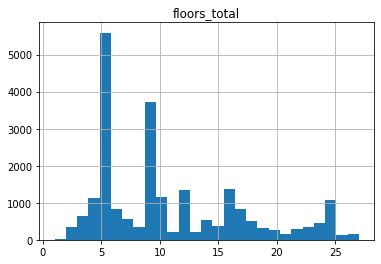

* расстояние до центра города в метрах;
Сначала плотность заселения и радиус охвата увеличиваются, доходит до определенного уровня и начинают уменьшатся за счет уменьшения плотности заселенности, по пикам можно определить скопление проживающих. Пик в начале может свидетелствовать о том, что в данном диопазоне максимальная плотность застройки, второй пик о выгодности застройки и популярности застройки на таком удалении (не слишком далеко и не слишком тесно).

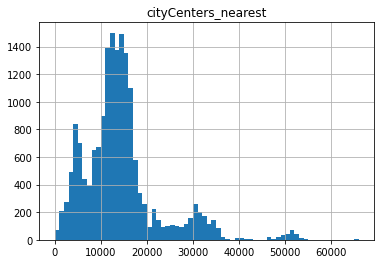

* расстояние до ближайшего аэропорта;
Тут можем предположить, что аэропорт находится в отдалении от основной жилой застройки, что вполне разумно но недалеко от города.

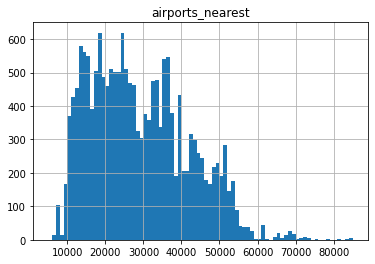

* расстояние до ближайшего парка;
Большинство квартир находятся не дальше 750м. от парка.

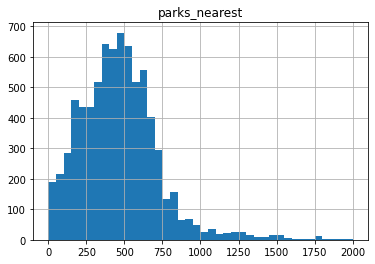

* день и месяц публикации объявления
В будни люди чаще размещают обявления чем в выходные. 
Пред и после новогодний месяцы сниженная активность, после резкий рост и небольшое снижение. В маи резкий спад, после рост, 3 летних месяца примерно на 1 уровне, после рост до декабря. Я считаю, что выборка в 5 лет не является репрезентативной.

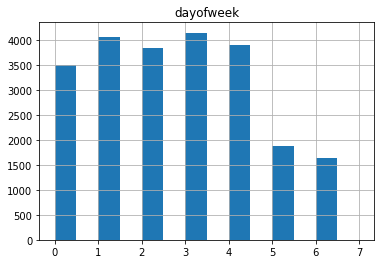

В будни люди чаще размещают обявления чем в выходные.

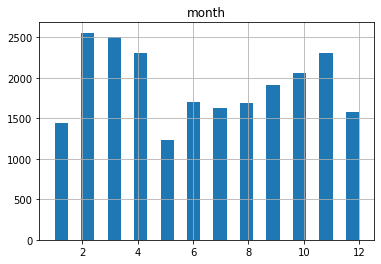

Пред и после новогодний месяцы сниженная активность, после резкий рост и небольшое снижение. В маи резкий спад, после рост, 3 летних месяца примерно на 1 уровне, после рост до декабря. Я считаю, что выборка в 5 лет не является репрезентативно особенно с учетом того, что первый год охватывает 2 месяца  а последний 5 есяцев. Причом 1 и последний месяц датасета лучше не учитывать поскольку они не полные.

#### Как быстро продавались квартиры

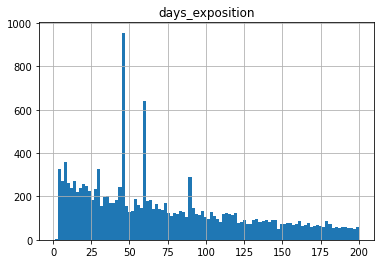

* Среднее время продажи квартиры в днях: 174
* Медианное время продажи квартиры в днях: 94
Есть несколько выбрасов, возможно в эти дни были какието акции или пиар компания. За быстрые обявления я бы взял первые 25% которые около 45 дней, а за необычно долгими взял бы последнии 25% тоесть свыше 220 дней. Хотя и средняя округленная до 180 дней кажется довольно долгим сроком и равняется почти полу году, что хорошо для восприятия.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта

* Корреляция между last_price и total_area составляет: 76.2%
* Корреляция между last_price и living_area составляет: 67.3%
* Корреляция между last_price и kitchen_area составляет: 48.7%
* Корреляция между last_price и rooms составляет: 46.7%
* Корреляция между last_price и floor_category_digit составляет: 5.7%
* Корреляция между last_price и year составляет: -5.0%

Цена зависит от:

* общей площади. (Имеет максимальную зависимость поскольку платят именно за нее)
* жилой площади. (Имеет значения, но при покупки платят за все метры, к примеру стоимость метров балкона может стоить 50% от стоимости метра)
* площади кухни. (Поскольку кухня только часть метража она не является ключевым факторам)
* количества комнат. (платят все же чащи за метраж, количество комнат это косвенный признак)

* Цена практически не зависит от:

* этажа, на котором расположена квартира;
(Первые этажи зачастую стоят немного дешевли, хотя в них и размещают магазины и офисы)
* даты размещения. 
(Тут скорее всего будут иметь значения при более длительной выборки годы, поскольку есть годы где действительно менялась сильно цены)

#### Средняя цена одного квадратного метра в 10 населённых пунктах.

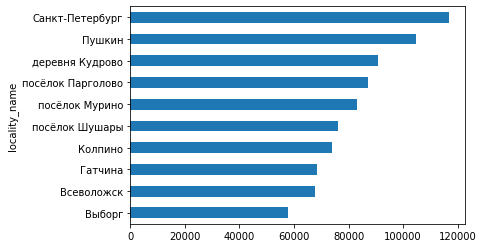

По графику видим, что самая дорогая недвижемость в самом Санкт-Петербурге. В 10 вошли самые близкие к Санкт-Петербургу населенные пункты.

#### Теперь выделите квартиры в Санкт-Петербурге и вычислите среднюю цену каждого километра.

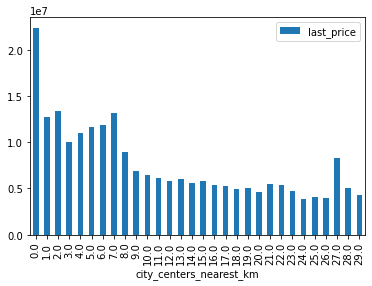

В центре самые дорогие квартиры. Особенно выделяется недвижимость до 1 км. После цена падат, с 3 до 7 км. немного растет и после снова падает. Есть пик на 27км., он появился из за малой выбарки в 2 значения и неявляется репрезентативным. Такое распределение возможно из за особеностей застройки, ценности зданий и пристижа района, расположением метро и других факторов.

Резюмирую. Санкт-Петербург очень спицефический город. Он строился сразу как сталица и постепенно расширялся позже. Имеет большой исторический центр с невысокой застройкой. Многие здания представляют архететурную и историческую ценность. В доиах досоветской постройки может быть очень своеобразная планеровка. Есть большая доля 5 и 9 этажных зданий. Новое жилье строится с учотом сохранения исторического ядра. Но и много общих тенденций присуще ему, таких как завышенная цена в самом центре города, в самом городе жилье дороже чем в области. Есть выбросы и анамалии, но при более глубоком анализе желательно с местным реелтаром можно их обяснить с большей точностью.

### Дополнительные графики

In [123]:
# check
import seaborn as sns
import matplotlib.pyplot as plt

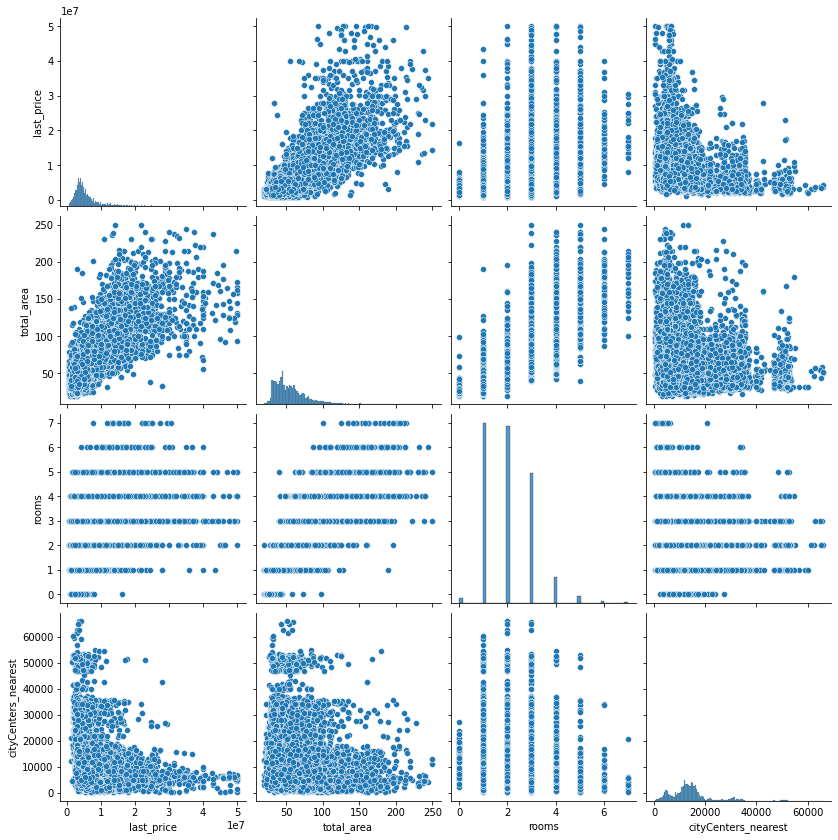

In [124]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])
plt.gcf().set_size_inches(12,12);


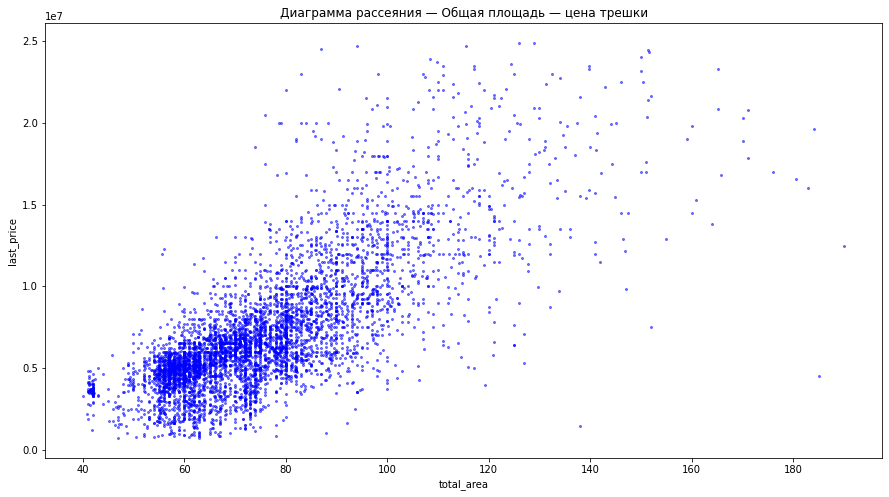

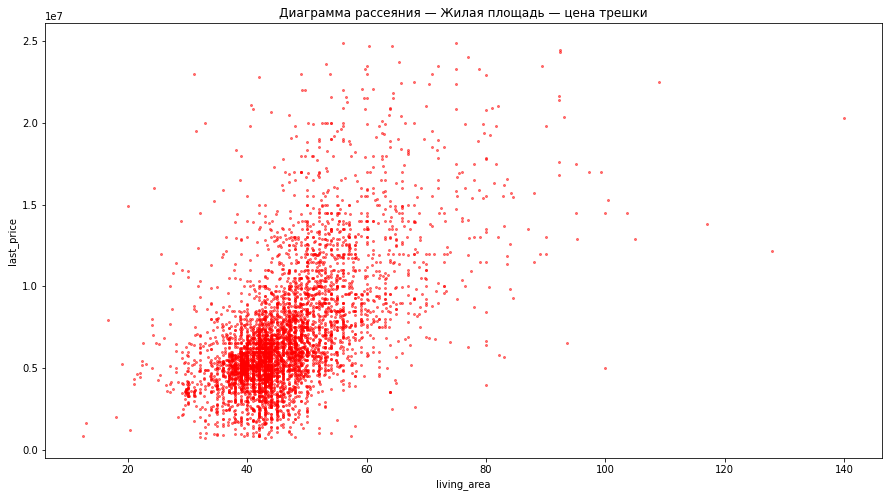

In [125]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

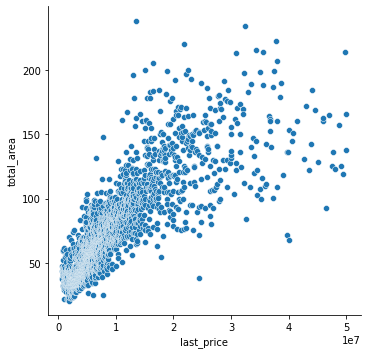

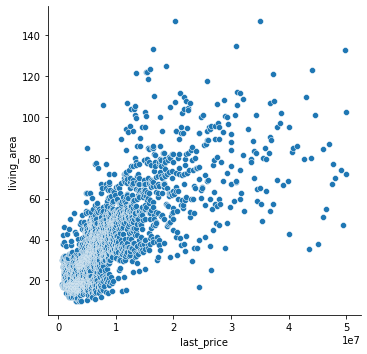

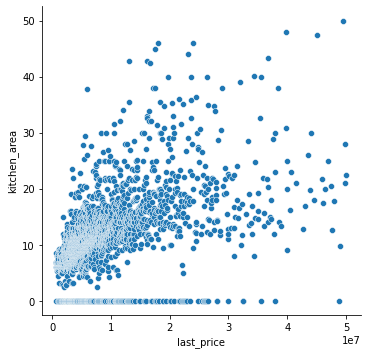

In [126]:
# check
price_pivot_area = data.pivot_table(index='last_price', values=([
    'total_area', 'living_area', 'kitchen_area']), aggfunc='median')
price_pivot_area = price_pivot_area.reset_index()
# Посмотрим на диаграммы рассеяния для столбцов 'total_area', 'living_area', 'kitchen_area'.
for row in ['total_area', 'living_area', 'kitchen_area']:
    sns.relplot(data=price_pivot_area, x='last_price', y=row, kind='scatter')

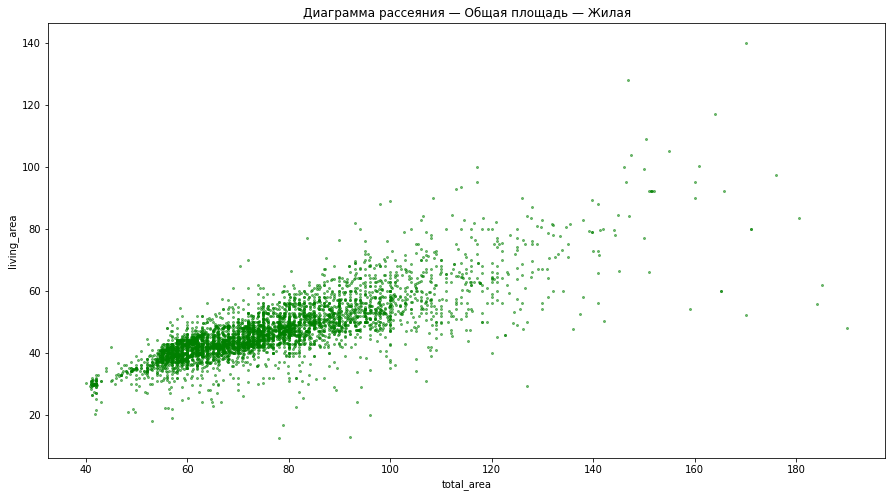

In [127]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'g', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');